In [14]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

We explore the database 'breast-cancer-wisconsin.data', obtained from the University of Wisconsin Hospitals (see all the references at the end of this notebook and in the README.md file). The database has the following structure: 669 rows and 11 columns. The columns represent the following quantitites
1) Sample code number: id number for each patient
2) Clump_thickness: 1-10, (neither units nor meaning of the interval specified)
3) Uniformity of cell size: 1-10, (neither units nor meaning of the interval specified)
4) Uniformity of cell shape: 1-10, (neither units nor meaning of the interval specified)
5) Marginal adhesion: 1-10, (neither units nor meaning of the interval specified)
6) Single epithelial cell size: 1-10, (neither units nor meaning of the interval specified)
7) Bare nuclei: 1-10, (neither units nor meaning of the interval specified)
8) Bland chromatin: 1-10, (neither units nor meaning of the interval specified)
9) Normal nucleoli: 1-10, (neither units nor meaning of the interval specified)
10) Mitoses: 1-10, (neither units nor meaning of the interval specified)
11) Class: 2 (benign tumor), 4 f(malignant tumor)

In [2]:
header = ['Sample_code_number',
          'Clump_thickness',
          'Uniformity_cell_size',
          'Uniformity_of_cell_shape',
          'Marginal_adhesion',
          'Single_epithelial_cell_size',
          'Bare_nuclei',
          'Bland_chromatin',
          'Normal_nucleoli',
          'Mitoses',
          'Class']

data = pd.read_csv('breast-cancer-wisconsin.data', sep=',', names=header)
display(data.head())
display(data.info())
display(data['Class'].value_counts())

,Sample_code_number,Clump_thickness,Uniformity_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample_code_number           699 non-null    int64 
 1   Clump_thickness              699 non-null    int64 
 2   Uniformity_cell_size         699 non-null    int64 
 3   Uniformity_of_cell_shape     699 non-null    int64 
 4   Marginal_adhesion            699 non-null    int64 
 5   Single_epithelial_cell_size  699 non-null    int64 
 6   Bare_nuclei                  699 non-null    object
 7   Bland_chromatin              699 non-null    int64 
 8   Normal_nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


None

Class
2    458
4    241
Name: count, dtype: int64

In the dataset we have 458 patients with a benign tumor and 241 with a malignat tumor. It seems that the daset has no missing values, but this is not the case: the 6th column 'Bare_nuclei' has 16 missing values indiated as '?'. 
We prefer to replace them with NaNs and we visualise them through a heatmap.

Bare_nuclei
1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: count, dtype: int64

16


<Axes: >

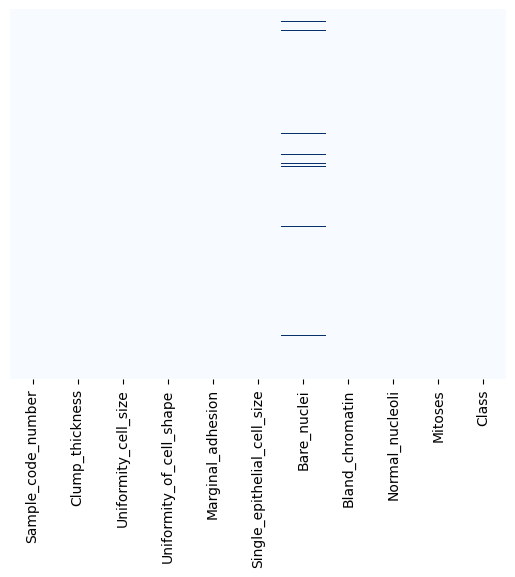

In [3]:
display(data['Bare_nuclei'].value_counts())
data.replace('?', np.nan, inplace=True)
data['Bare_nuclei'] = pd.to_numeric(data['Bare_nuclei']) # now it is float
print(sum(data['Bare_nuclei'].isnull()))                 # number of NaNs
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='Blues') # just to visually check where NaNs are, 
                                                                        # difficult to get the amount of NaNs from here


It is time to visualise the dataset. Below we plot the distribution for all the quantities (excluding the patient number) for the two tumor classes: in blue we show the benign case and in orange the malignant case. We also plot the mean (dash-dot line), median (dashed line) and +/- 1 stanadard deviation for each distribution (dotted lines). We see that, fot the benign case, mean and median are always centered around low values (betwee ~1 and ~3), while for the malignant case the oposite holds (> ~4). The only exception is the 'Mitoses' distribution, which does not seem to be a strong indicator of the nature of the tumor. 

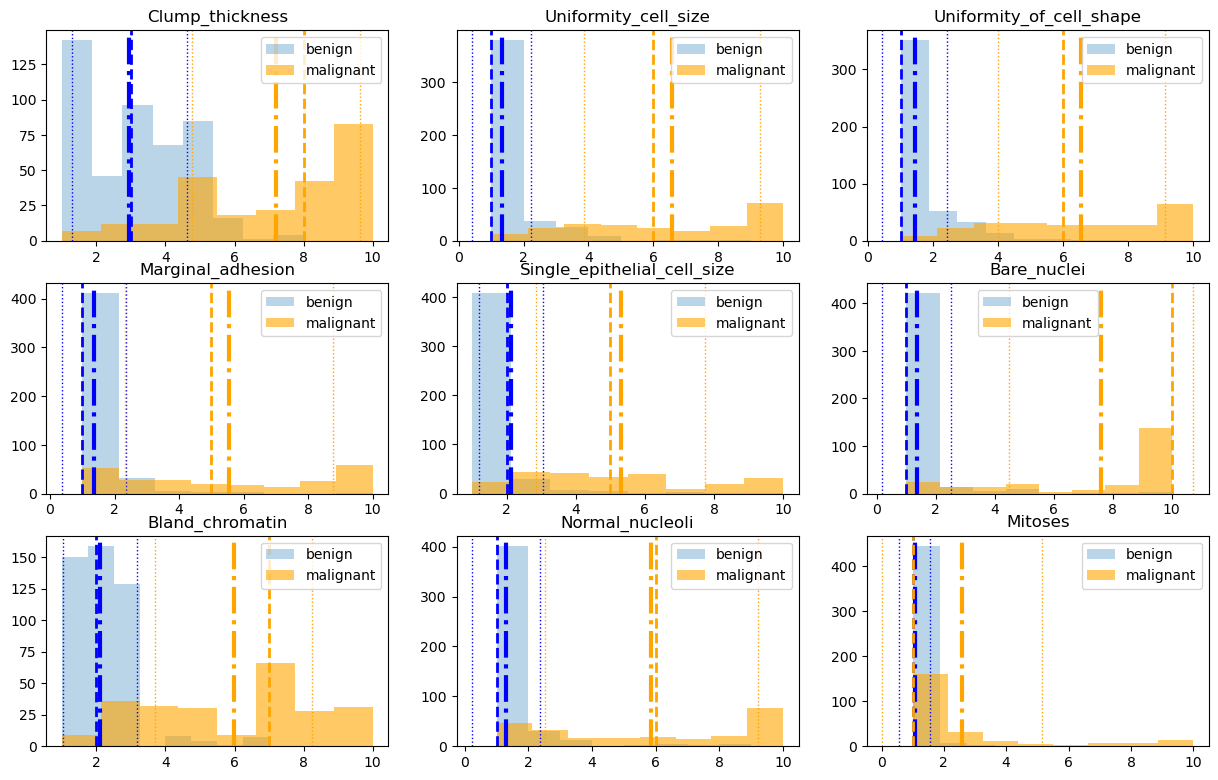

In [15]:
data_noid  = data.drop(columns='Sample_code_number')
groups     = data_noid.groupby('Class')
data_b     = groups.get_group(2)
data_m     = groups.get_group(4)

nrows = 3
ncol  = 3
fig, axes = plt.subplots(nrows, ncol, figsize=(15, 3.1*nrows))
axes = axes.flatten()
for i, col in enumerate(data_b.columns[:9]):
    mean_b   = data_b[col].mean()
    median_b = data_b[col].median()
    std_b    = data_b[col].std()
    mean_m   = data_m[col].mean()
    median_m = data_m[col].median()
    std_m    = data_m[col].std()
    axes[i].hist(data_b[col], alpha =0.3, bins=8, label='benign')
    axes[i].axvline(mean_b, color='blue', linestyle='-.', linewidth=3)
    axes[i].axvline(median_b, color='blue', linestyle='--', linewidth=2)
    axes[i].axvline(mean_b - std_b, color='blue', linestyle=':', linewidth=1)
    axes[i].axvline(mean_b + std_b, color='blue', linestyle=':', linewidth=1)
    # Linee deviazione standard (media ± std)
    axes[i].hist(data_m[col], color='orange', alpha =0.6, bins=8, label='malignant')
    axes[i].axvline(mean_m, color='orange', linestyle='-.', linewidth=3)
    axes[i].axvline(median_m, color='orange', linestyle='--', linewidth=2)
    axes[i].axvline(mean_m - std_m, color='orange', linestyle=':', linewidth=1)
    axes[i].axvline(mean_m + std_m, color='orange', linestyle=':', linewidth=1)
   # axes[i].set_yscale('log')
    axes[i].set_title(col)
    axes[i].legend()


#data.drop(columns='Sample_code_number').hist(figsize=(10,10))

We need to prepare the data for the ML algorithm. To do this, we need to drop or replace the missing values. First, we want to check to which tumor case they correspond.

In [5]:
data.loc[data['Bare_nuclei'].isnull(), 'Class']

23     4
40     2
139    2
145    2
158    2
164    2
235    2
249    2
275    2
292    4
294    2
297    2
315    2
321    2
411    2
617    2
Name: Class, dtype: int64

All the missing values correspond to benign tumors, apart from the one at row 23. Since the distribution of 'Bare_nuclei' for the benign case is narrow around the mean, we take the mean as a representative value. For consistency, we folllow a similar approach also for the case of the malignant tumor.

In [6]:
data.at[23, 'Bare_nuclei'] = data_m['Bare_nuclei'].mean()
data.loc[data['Bare_nuclei'].isnull(), 'Bare_nuclei'] = data_b['Bare_nuclei'].mean()

We now implement our Classification problem with scikit-learn. We use the Logistic Regression model.

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

We try two possible values of the hyperparameter max_iter, to see if there is an improvement in the accuracy score. The accuracy and all the other metrics remain the same since the model already converge after 29 iterations (model.n_iter_). 

Conlcusions: our model is able to predict the correct anser ~97% of times. If we focus on the malignant class, we see that our model predicts ~95% malignant tumors above all the malignant cases (precision) and that ~95% actual malignant tumors were found (recall).

In [13]:
X = data.drop(columns=['Sample_code_number', 'Class'])
y = data['Class'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

maxi = [100, 200]
for i in maxi:
    print(i)
    model = LogisticRegression(max_iter=i, random_state=42)
    print("Effective iterations:", model.n_iter_)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy  = accuracy_score(y_test, y_pred)
    print('Accuracy:', accuracy)
    class_rep = classification_report(y_test, y_pred)
    print('Classification report:\n', class_rep)



100
Accuracy: 0.9714285714285714
Classification report:
               precision    recall  f1-score   support

           2       0.98      0.98      0.98        50
           4       0.95      0.95      0.95        20

    accuracy                           0.97        70
   macro avg       0.96      0.96      0.96        70
weighted avg       0.97      0.97      0.97        70

Effettive iterazioni: [29]
200
Accuracy: 0.9714285714285714
Classification report:
               precision    recall  f1-score   support

           2       0.98      0.98      0.98        50
           4       0.95      0.95      0.95        20

    accuracy                           0.97        70
   macro avg       0.96      0.96      0.96        70
weighted avg       0.97      0.97      0.97        70

Effettive iterazioni: [29]


This breast cancer databases was obtained from the University of Wisconsin
Hospitals, Madison from Dr. William H. Wolberg.  

References:

1. O. L. Mangasarian and W. H. Wolberg: "Cancer diagnosis via linear 
      programming", SIAM News, Volume 23, Number 5, September 1990, pp 1 & 18.

 2. William H. Wolberg and O.L. Mangasarian: "Multisurface method of 
      pattern separation for medical diagnosis applied to breast cytology", 
      Proceedings of the National Academy of Sciences, U.S.A., Volume 87, 
      December 1990, pp 9193-9196.

3. O. L. Mangasarian, R. Setiono, and W.H. Wolberg: "Pattern recognition 
      via linear programming: Theory and application to medical diagnosis", 
      in: "Large-scale numerical optimization", Thomas F. Coleman and Yuying
      Li, editors, SIAM Publications, Philadelphia 1990, pp 22-30.

4. K. P. Bennett & O. L. Mangasarian: "Robust linear programming 
      discrimination of two linearly inseparable sets", Optimization Methods
      and Software 1, 1992, 23-34 (Gordon & Breach Science Publishers).